# Classic BerTopic

In [15]:
!pip install bertopic

  Using cached bertopic-0.16.3-py3-none-any.whl.metadata (23 kB)
  Using cached hdbscan-0.8.38.post1-cp312-cp312-linux_x86_64.whl
  Using cached sentence_transformers-3.1.1-py3-none-any.whl.metadata (10 kB)
  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached transformers-4.44.2-py3-none-any.whl.metadata (43 kB)
  Using cached torch-2.4.1-cp312-cp312-manylinux1_x86_64.whl.metadata (26 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached tokenizers-0.19.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached bertopic-0.16.3-py3-none-any.whl (143 kB)
Using cached sentence_transformers-3.1.1-py3-none-any.whl (245 kB)
Using cached umap_learn-0.5.6-py3-none-any.whl (85 kB)
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
Using cached torch-2.4.1-cp312-cp312-manylinux1_x86_64.whl (797.0 MB)
U

### basic

In [176]:
with open('data/normalized.txt') as f:
    text = f.read()

In [177]:
topic_model = BERTopic(language="french", min_topic_size=20)

topics, probs = topic_model.fit_transform(text)

TypeError: Make sure that the documents variable is an iterable containing strings only.

In [27]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,316,0_de_et_la_que,"[de, et, la, que, les, le, il, qu, qui, en]",[127 neantmoins ce puissant Genie a sibien sç...
1,1,76,1_la_de_peintvre_dv,"[la, de, peintvre, dv, partie, axiome, estampe...","[DE LA PEINTVRE., DE LA PEINTVRE., DE LA PEINT..."


In [28]:
topic_model.visualize_topics()

ValueError: zero-size array to reduction operation maximum which has no identity

In [24]:
topic_model.visualize_heatmap()

In [25]:
topic_model.visualize_hierarchy()

### other

In [206]:
!pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 45.1 MB/s eta 0:00:00


In [207]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords

In [202]:
documents = text.split("\n")

In [217]:
vectorizer_model = CountVectorizer(stop_words=stopwords.words('french'))
embedding_model = SentenceTransformer("distiluse-base-multilingual-cased-v2")
topic_model = BERTopic(vectorizer_model=vectorizer_model, embedding_model=embedding_model)

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

In [218]:
topics, probabilities = topic_model.fit_transform(documents)

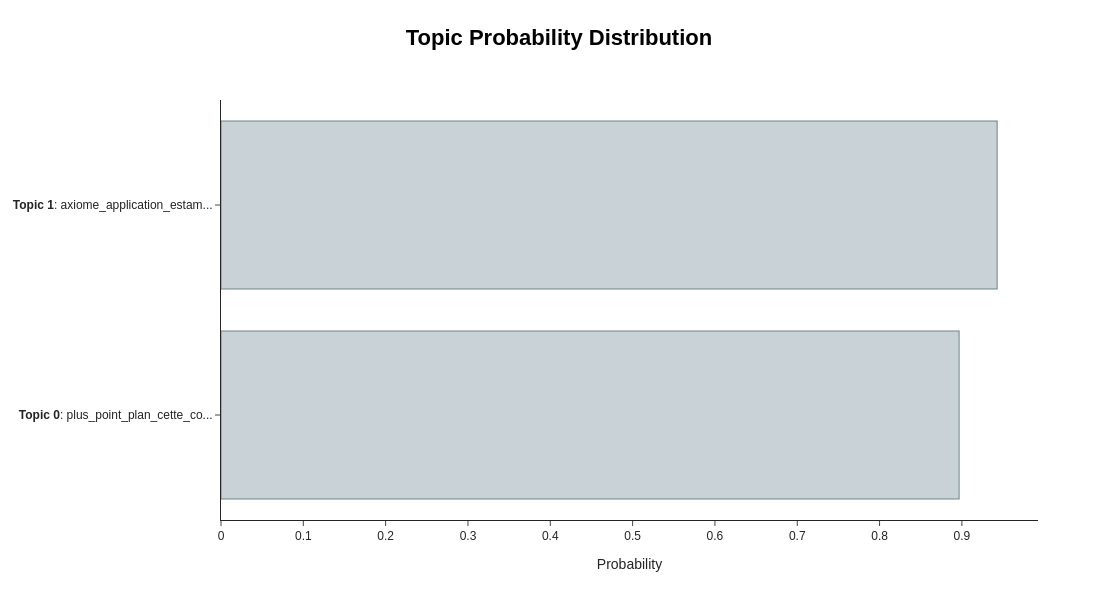

In [219]:
topic_model.visualize_distribution(probabilities).show()

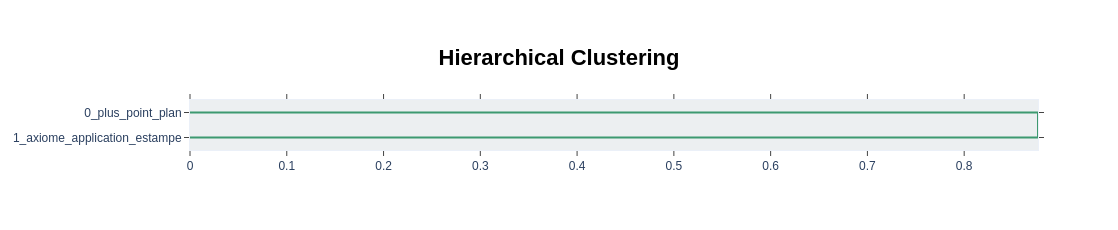

In [220]:
topic_model.visualize_hierarchy().show()

In [221]:
topic_info = topic_model.vectorizer_model.get_feature_names_out()
print(topic_info)

['40' '44' '45' ... 'éviter' 'être' 'œil']


#### search

In [226]:
similar_topics, similarity = topic_model.find_topics("peinture", top_n=5)
topic_model.get_topic(similar_topics[0])

[('axiome', 0.41373671990888516),
 ('application', 0.20708686985838395),
 ('estampe', 0.1936047496660148),
 ('4b', 0.11507917949936397),
 ('4r', 0.11507917949936397),
 ('deuxième', 0.11507917949936397),
 ('dégradez', 0.11507917949936397),
 ('costume', 0.11507917949936397),
 ('descente', 0.11507917949936397),
 ('chambray', 0.11507917949936397)]

#### TF-IDF

In [258]:
documents

["IDE DE DE PERFECTION DE LA pEINTURE DEMONSTRE PAR LES PRINCIPES de l'Art, et par des Exemples conformes aux Observations que Pline et Quintilien ont faites sur les plus ce lébres Tableaux des Anciens Peintres, mis en Paralelle à quelques Ouvres de nos Tilleurs Peintres Modernes, Léonard de Vinci, Raphael, Iules Romain, et le Poussin.",
 'PAR ROLAND FREART SIEUR 6E CHAMBRAY.',
 'H Heureux AU MANS.',
 "De l'Imprimerie de IA CQVESYs AMBART Marchand Libraire, et Imprimeur, demeurant au bas du Pont-neuf, à l'Enseigne du saint Esprit.",
 'M. . LXII.',
 'AVEC PRIVILÈGE DU ROY.',
 "5ource galica.bnf.fr cette Bibliothèque natonale de France PERTE CTION 40 mier effet de la perspective dans les figures, qui est de les montrer plus petites ou plus grandes, selon qu'elles sont ou plus ou moins avancées dans la profondeur du plan, il est manifeste ici, quelles diminuent successiuement, en telle sorte, que de la première, qui est Minerve, comparée auec Mercure, lemp a dans le Tableau, il y a notab

In [270]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True, stop_words=stopwords.words('french'))
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(documents)

In [271]:
tfidf_vectorizer.get_feature_names_out()

array(['40', '44', '45', ..., 'éviter', 'être', 'œil'], dtype=object)

In [272]:
tfidf_vectorizer_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1847 stored elements and shape (56, 1052)>

In [273]:
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 

In [274]:
print(first_vector_tfidfvectorizer.shape)

(1, 1052)


In [278]:
import pandas as pd

df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])

In [280]:
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
peintres,0.295417
mis,0.197619
pline,0.197619
faites,0.197619
romain,0.197619
...,...
examiner,0.000000
excellente,0.000000
excuser,0.000000
excédait,0.000000


# TopicModelling with langchain

In [3]:
import getpass
import os

if "MISTRAL_API_KEY" not in os.environ:
    os.environ["MISTRAL_API_KEY"] = getpass.getpass("Enter your Mistral API key: ")

Enter your Mistral API key:  ········


In [5]:
from langchain_mistralai import ChatMistralAI

llm = ChatMistralAI(
    model="mistral-large-latest",
    temperature=0,
    max_retries=2,
    timeout=500
)

In [19]:
from langchain_core.documents import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter

def read_txt_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    return content
    
def split_text(content, chunk_size=1000, chunk_overlap=200):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size, 
        chunk_overlap=chunk_overlap
    )
    chunks = text_splitter.split_text(content)
    return [Document(page_content=chunk) for chunk in chunks]

def create_documents_from_txt(file_path):
    content = read_txt_file(file_path)
    return split_text(content)

In [163]:
file_path = "data/normalized.txt"

focus_area = None

In [167]:
from langchain.chains.question_answering import load_qa_chain
from bertopic.representation import LangChain

chain = load_qa_chain(llm, chain_type="stuff")

prompt= """You are an expert in historical research and digital humanities. Your task is to perform topic modeling on a collection of 17th-century texts related to artistic literacy. The goal is to identify key themes and patterns concerning how literacy in the visual arts was discussed, taught, and disseminated during this time. The corpus includes a variety of sources such as treatises, letters, art critiques, biographies, and educational documents.
            Please conduct a general topic modeling analysis of the corpus. 
            Please analyze the following:
            - Discussions of artistic techniques and methods.
            - The role of patrons and their influence on artistic education.
            - References to classical texts and their impact on art education.
            - The vocabulary used to critique and describe artworks.
            - The role of artists as intellectuals and how literacy influenced their work.
            Provide a summary of the discovered topics, highlighting any significant trends or insights about the relationship between literacy and the visual arts in the 17th century from this corpus.
            """
prompt = "What are these senteces about? Please give a single or multiple labels."
representation_model = LangChain(chain, prompt=prompt)
#representation_model = LangChain(chain)

In [168]:
documents = create_documents_from_txt(file_path)

In [169]:
document_texts = [doc.page_content for doc in documents]

In [170]:
topic_model = BERTopic(representation_model=representation_model)

In [171]:
topics, probs = topic_model.fit_transform(document_texts)

HTTPStatusError: Error response 429 while fetching https://api.mistral.ai/v1/chat/completions: {"message":"Requests rate limit exceeded"}

In [ ]:
topics

In [ ]:
probs

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.get_document_info(document_texts)